# Advanced ML: Домашнее задание 4

Николай Горев

Группа MADE-DS-22

In [1]:
import os
import numpy as np
import random
from itertools import combinations, product
import matplotlib.pyplot as plt
%matplotlib inline
import string

In [2]:
random.seed(0)
np.random.seed(0)

In [3]:
corpora_path = 'corpora'
corpora_ru = list(open(os.path.join(corpora_path, 'WarAndPeace.txt'), encoding="utf-8")) + \
             list(open(os.path.join(corpora_path, 'AnnaKarenina.txt'), encoding="utf-8"))

In [4]:
# переведем в строчные буквы, удалим все символы, кроме букв из алфавита
def clearLine(text, alphabet):
    clean_line = ''
    for symbol in text.lower():
        if symbol in alphabet:
            clean_line += symbol
    return ' '.join(clean_line.split())
            
def clearCorpora(corpora_data, alphabet):
    cleaned_data = []
    for line in corpora_data:
        clean_line = clearLine(line, alphabet)
        if len(clean_line) > 0:
            clean_line += ' '
            cleaned_data.append(clean_line)
            
    return cleaned_data

alphabet_ru = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
corpora_ru = clearCorpora(corpora_ru, alphabet_ru)

**1.** Реализуйте базовый частотный метод по Шерлоку Холмсу:
- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе совсем вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
- расшифруйте их таким частотным методом.

In [5]:
def calculateLettersFreques(alphabet, corpora_data):
    total_number = len(alphabet)
    freques = {''.join(symbol) : 0 for symbol in alphabet}
    
    for line in corpora_data:
        for symbol in line:
            freques[symbol] += 1
            total_number += 1

    for symbol in freques:
        freques[symbol] /= total_number
    
    return freques

freques_ru = calculateLettersFreques(alphabet_ru, corpora_ru)

In [6]:
# тестовый текст, на котором будем проверять алгоритмы
message = 'В течение многих часов Шерлок Холмс сидел  согнувшись  над ' +\
          'стеклянной  пробиркой,  в  которой  варилось что-то на редкость ' +\
          'вонючее. Голова его была опущена на грудь,  и  он  казался  мне ' +\
          'похожим  на  странную  тощую  птицу с тусклыми серыми перьями и ' +\
          'черным хохолком.'

test_message = clearLine(message, alphabet_ru)
print(test_message)

в течение многих часов шерлок холмс сидел согнувшись над стеклянной пробиркой в которой варилось чтото на редкость вонючее голова его была опущена на грудь и он казался мне похожим на странную тощую птицу с тусклыми серыми перьями и черным хохолком


In [7]:
# шифрователь случайной перестановкой символов
class RandomPermuteCipher:
    def __init__(self, alphabet):
        self.alphabet = alphabet
        
        permutation = np.random.permutation(len(alphabet))
        self.cipher_dict = {}
        for i in range(len(alphabet)):
            self.cipher_dict[alphabet[i]] = alphabet[permutation[i]]

    def cipher(self, message):
        return ''.join([self.cipher_dict.get(symbol, '') for symbol in message])

In [8]:
# расшифровывает по готовому словарю
def decipher(ciphered, decipher_dict):
    return ''.join([decipher_dict.get(symbol, '') for symbol in ciphered])

In [9]:
cipher = RandomPermuteCipher(alphabet_ru)

ciphered = cipher.cipher(test_message)
print(ciphered)

шахщдщм щазмыр ёадкьышасщноычаёыозьаь вщоаьырмбшс ьжамкваьхщчогммыэаеныу нчыэашачыхыныэашкн оыьжадхыхыамканщвчыьхжашымъдщщарыоышкащрыауиокаыебфщмкамкарнбвжа аымачкйкоьгазмщаеыёып замкаьхнкммбъахыфбъаех цбаьахбьчоиз аьщниз аещнжгз а адщнмизаёыёыочыз


In [10]:
# подсчитываем частоты символов в зашифрованном сообщении
# упорядочиваем по убыванию частоты и составляем словарь
# расшифровки сопоставляя зашифрованные символы символам
# из корпуса по частоте
def getDecipherUnigramm(ciphered, freques_dict):
    freques = {symbol : 0 for symbol in set(ciphered)}
    for symbol in ciphered:
        freques[symbol] += 1

    freques = sorted([(letter, freq) for letter, freq in freques.items()], 
                     key=lambda p : p[1], reverse=True)
    corpusFreques = sorted([(letter, freq) for letter, freq in freques_dict.items()], 
                         key=lambda p : p[1], reverse=True)

    decipher_dict = {}
    for i in range(len(freques)):
        decipher_dict[freques[i][0]] = corpusFreques[i][0]
    
    return decipher_dict

In [11]:
decipher_dict = getDecipherUnigramm(ciphered, freques_ru)

In [12]:
decipher(ciphered, decipher_dict)

'м вагаеиа реояиу гтном хаслок уолрн нибал нояедмхинп етб нваклчееоз ьсошискоз м ковосоз мтсилонп гвово ет сабконвп моежгаа яоломт аяо шылт оьдйает ет ясдбп и ое ктэтлнч реа ьоуоюир ет нвстеедж войдж ьвицд н вднклыри насыри ьаспчри и гасеыр уоуолкор'

In [13]:
# доля правильно расшифрованных букв
def decipherQuality(cipher_dict, decipher_dict):
    n_correct = 0
    for symbol in cipher_dict.keys():
        ciphered_symbol = cipher_dict[symbol]
        if ciphered_symbol in decipher_dict and symbol == decipher_dict[ciphered_symbol]:
            n_correct += 1
    return n_correct / len(decipher_dict)
    
decipherQuality(cipher.cipher_dict, decipher_dict)    

0.23333333333333334

**2.** Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
- подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
- проведите тестирование аналогично п.1, но при помощи биграмм.

In [14]:
def calculateBigrammFreques(alphabet, corpora_data):
    total_number = len(alphabet) ** 2
    freques = {''.join(bigramm) : 1 for bigramm in product(alphabet, repeat=2)}
    
    for line in corpora_data:
        for i in range(len(line) - 1):
            bigramm = line[i : i + 2]
            freques[bigramm] += 1
            total_number += 1
            
    for ngramm, freq in freques.items():
        freques[ngramm] = np.log(freq / total_number)
        
    return freques

bigramm_logfreques_ru = calculateBigrammFreques(alphabet_ru, corpora_ru)

In [15]:
def getDecipherBigramm(ciphered, freques_dict):
    text_symbols = list(set(ciphered))
    freques = {''.join(bigramm) : 1 for bigramm in product(text_symbols, repeat=2)}

    for i in range(len(ciphered) - 1):
        bigramm = ciphered[i : i + 2]
        freques[bigramm] += 1

    freques = sorted([(bigramm, freq) for bigramm, freq in freques.items()], 
                     key=lambda p : p[1], reverse=True)
   
    corpusFreques = sorted([(bigramm, freq) for bigramm, freq in freques_dict.items()], 
                         key=lambda p : p[1], reverse=True)

    decipher_dict = {}
    
    # жадный алгоритм - зашифрованным биграммам с большей частотой
    # подбираем расшифровку биграммамами из корпуса с наибольшей
    # возможной частотой с учетом символов, добавленных в словарь
    # расшифровки на предыдущих шагах алгоритма
    for i in range(len(freques)):
        l1, l2 = freques[i][0]
        if l1 in decipher_dict:
            if l2 in decipher_dict:
                pass
            else:
                for j in range(len(corpusFreques)):
                    d1, d2 = corpusFreques[j][0]
                    if (d1 in decipher_dict.values() and 
                        d2 not in decipher_dict.values()):
                        decipher_dict[l2] = d2
                        break
        else:
            if l2 in decipher_dict:
                for j in range(len(corpusFreques)):
                    d1, d2 = corpusFreques[j][0]
                    if (d1 not in decipher_dict.values() and 
                        d2 in decipher_dict.values()):
                        decipher_dict[l1] = d1
                        break
            else:
                for j in range(len(corpusFreques)):
                    d1, d2 = corpusFreques[j][0]
                    if (d1 not in decipher_dict.values() and 
                        d2 not in decipher_dict.values()):
                        decipher_dict[l1] = d1
                        decipher_dict[l2] = d2
                        break
                
    return decipher_dict

decipher_dict = getDecipherBigramm(ciphered, bigramm_logfreques_ru)

In [16]:
decipher(ciphered, decipher_dict)

'вогпдпиепоыитчесода твошпрктяосткы о ейпко тчимвше ьоиайо гпякэиитлонртхерятловоятгтртловарект ьодгтгтоиаорпйят гьовтиудппочтктваопчтохбкаотнмзпиаоиаочрмйьоеотиояаюак эоыипонтстжеыоиао граиимуогтзмуонгещмо огм якбыео прбыеонпрьэыеоеодприбыостсткяты'

In [17]:
decipherQuality(cipher.cipher_dict, decipher_dict)

0.2

Получилось также плохо, как и по частотам отдельных букв. 

**3.**	Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
- предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
- реализуйте и протестируйте его, убедитесь, что результаты улучшились

Прежде всего, построим критерий качества получаемого после расшифровки текста на основе статистики биграмм (в более общем случае - n-грамм). Будем считать, что текст - марковская цепь. В качестве критерия качества будем использовать логарифм правдоподобия текста: $$llh = \sum \log\left(p(symbol_{i+n}|symbol_{i}, \dots symbol_{i + n - 1})\right)$$
Здесь $\log\left(p(symbol_{i+n}|symbol_{i}, \dots symbol_{i + n - 1})\right)$ - логарифм условной вероятности появления символа при условии известных $(n - 1)$ предыдущих символов (для биграмм - при условии предыдущего символа). Эти вероятности будем оценивать на основе статистики n-грамм корпуса текстов.

In [18]:
def buildNgrammDict(alphabet, corpora_data, ngramm_length=2):
    total_number = len(alphabet) ** ngramm_length
    freques = {''.join(ngramm) : 1 for ngramm in product(alphabet, repeat=ngramm_length)}
    
    for line in corpora_data:
        for i in range(len(line) - ngramm_length + 1):
            ngramm = line[i : i + ngramm_length]
            freques[ngramm] += 1
            total_number += 1


    freques_cond = {''.join(ngramm) : {symbol : 0 for symbol in alphabet} 
                    for ngramm in product(alphabet, repeat=ngramm_length - 1)}
    tot_num = {''.join(ngramm) : 0 for ngramm in product(alphabet, repeat=ngramm_length - 1)}
    for ngramm, freq in freques.items():
        freques_cond[ngramm[:-1]][ngramm[-1]] += freq
        tot_num[ngramm[:-1]] += freq
    for prefix, freq_mar in freques_cond.items():
        for symbol, freq in freq_mar.items():
            freques_cond[prefix][symbol] = np.log(freq / tot_num[prefix])
            
    return freques_cond

bigramm_logfreques_ru = buildNgrammDict(alphabet_ru, corpora_ru, ngramm_length=2)

In [19]:
# логарифм правдоподобия текста по частотам биграмм
def calculateBigrammLLH(text):
    # для первого символа текста неявно считаем, 
    # что перед ним находится пробел
    llh = bigramm_logfreques_ru[' '][text[0]]
    
    for i in range(len(text) - 1):
        llh += bigramm_logfreques_ru[text[i]][text[i + 1]]
        
    return llh

В качестве начального приближения возьмем декодирующую перестановку, полученную по частотам отдельных букв.

Используя MCMC-сэмплирование, построим последовательность дешифрующих перестановок символов, переставляя на каждом шаге пару символов. Считаем, что распределение дешифрующих перестановок пропорционально правдоподобию расшифрованного текста. Перестановку с лучшим правдоподобием сохраняем. 

In [20]:
def getDecipherMCMC(ciphered, calculateLLH, unigramm_dict, steps=100):
    # начальное приближение - словарь по частотам отдельных букв
    decipher_dict = getDecipherUnigramm(ciphered, unigramm_dict)
    
    # дополним начальное приближение до полного алфавита
    for i, s in enumerate(unigramm_dict.keys() - decipher_dict.values()):
        decipher_dict[chr(ord(max(decipher_dict.keys())) + 1 + i)] = s
    
    max_llh = calculateLLH(decipher(ciphered, decipher_dict))
    best_dict = decipher_dict.copy()
    
    prev_llh = max_llh

    symbols = list(decipher_dict.keys())
    symbols_pairs = list(combinations(symbols, 2))
    
    iteration = 0
    while iteration < steps:
        iteration += 1
        for a, b in np.random.permutation(symbols_pairs):
            new_dict = decipher_dict.copy()
            new_dict[a], new_dict[b] = new_dict[b], new_dict[a]
            llh = calculateLLH(decipher(ciphered, new_dict))
            if llh > prev_llh or random.random() < np.exp(llh - prev_llh):
                decipher_dict = new_dict.copy()
                prev_llh = llh

            if llh > max_llh:
                max_llh = llh
                best_dict = new_dict.copy()
                iteration = 0
                break

    return best_dict

In [21]:
decipher_dict = getDecipherMCMC(ciphered, calculateBigrammLLH, freques_ru)

In [22]:
decipher(ciphered, decipher_dict)

'в течение мнодиг часов шерлок голмс сизел соднувшись наз стеклянной пробиркой в которой варилось чтото на резкость вонючее долова едо была опужена на друзь и он кахался мне погофим на странную тожую птицу с тусклыми серыми перьями и черным гоголком'

In [23]:
decipherQuality(cipher.cipher_dict, decipher_dict)

0.7058823529411765

Качество дешифровки стало существенно лучше.

**4.** Расшифруйте сообщение:

←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨
⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌
⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛
↹↝←↹⇛↲←⇆⇴⇏

In [24]:
ciphered_final = '←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏'

In [25]:
len(ciphered_final)

230

In [26]:
random.seed(0)
np.random.seed(0)

decipher(
    ciphered_final, 
    getDecipherMCMC(
        ciphered_final, 
        calculateBigrammLLH, 
        freques_ru,
        steps=1000
    )
)

'если вы вимите нордальный или почти нордальный текст у этого сообщения который легко прочитать скорее всего вы все смелали правильно и получите даксидальный балл за послемнее четвертое замание курса хотя конечно я ничего не обещаж'

**5.** Бонус : а что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.

In [27]:
trigramm_logfreques_ru = buildNgrammDict(alphabet_ru, corpora_ru, ngramm_length=3)

In [28]:
# логарифм правдоподобия текста по частотам триграмм
def calculateTrigrammLLH(text):
    llh = bigramm_logfreques_ru[' '][text[0]] + bigramm_logfreques_ru[text[0]][text[1]]
    for i in range(len(text) - 2):
        llh += trigramm_logfreques_ru[text[i:i + 2]][text[i + 2]]
    return llh

In [29]:
TRIALS = 100
bigramm_performance = []
trigramm_performance = []
for trial in range(TRIALS):
    cipher = RandomPermuteCipher(alphabet_ru)
    ciphered = cipher.cipher(test_message)
    decipher_dict_bigramm = getDecipherMCMC(ciphered, 
                                            calculateTrigrammLLH, 
                                            freques_ru)
    bigramm_performance.append(decipherQuality(cipher.cipher_dict, decipher_dict_bigramm))
    decipher_dict_trigramm = getDecipherMCMC(ciphered, 
                                             calculateTrigrammLLH, 
                                             freques_ru)
    trigramm_performance.append(decipherQuality(cipher.cipher_dict, decipher_dict_trigramm))

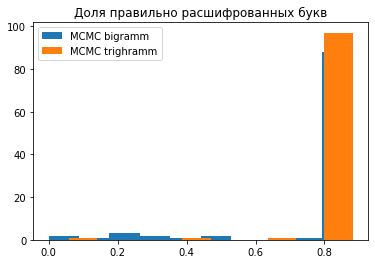

In [30]:
plt.hist(bigramm_performance, label='MCMC bigramm')
plt.hist(trigramm_performance, label='MCMC trighramm')
plt.legend()
plt.title('Доля правильно расшифрованных букв')
plt.show();

In [31]:
np.mean(bigramm_performance), np.mean(trigramm_performance)

(0.81, 0.8679411764705881)

С триграммами результат чуть лучше. Попробуем на зашифрованном сообщении из предыдущего пункта.

In [32]:
random.seed(0)
np.random.seed(0)

decipher(
    ciphered_final, 
    getDecipherMCMC(
        ciphered_final, 
        calculateTrigrammLLH, 
        freques_ru,
        steps=1000
    )
)

'если вы видите нормальный или почти нормальный текст у этого сообщения который легко прочитать скорее всего вы все сделали правильно и получите максимальный балл за последнее четвертое задание курса хотя конечно я ничего не обещаю'